<img style="float: left;;" src='Figures/alinco.png' /></a>


# <center> <font color= #000047> Módulo 2: Algoritmo Genéticos

## Introducción

>Los algoritmos genéticos son métodos de optimización heurística que, entre otras aplicaciones, pueden emplearse para encontrar el valor o valores que consiguen maximizar o minimizar una función.

Su funcionamiento está inspirado en la [teoría evolutiva de selección natural](https://es.wikipedia.org/wiki/Selecci%C3%B3n_natural) propuesta por Darwin y Alfred Russel: los individuos de una población se reproducen generando nuevos descendientes, cuyas características, son combinación de las características de los progenitores (más ciertas mutaciones). De todos ellos, únicamente los mejores individuos sobreviven y pueden reproducirse de nuevo, transmitiendo así sus características a las siguientes generaciones.

> *El método de algoritmo genético es solo una de las muchas estrategias de optimización heurística que existen, una alternativa común es el método de enjambre de partículas.

> *La optimización heurística no tiene por qué ser la forma de optimización más adecuada en todos los escenarios. Si el problema en cuestión puede optimizarse de forma analítica, suele ser más adecuado resolverlo de esta forma.*

> *La implementación de algoritmo que se muestra en este documento pretende ser lo más explicativa posible aunque para ello no sea la más eficiente.*


## Algoritmo 

Aunque existen variaciones, algunas de las cuales se describen a lo largo de este documento, en términos generales, la estructura de un algoritmo genético para optimizar (maximizar o minimizar) una función con una o múltiples variables sigue los siguientes pasos:


1. Crear una población inicial aleatoria de $P$ individuos. En este caso, cada individuo representa una combinación de valores de las variables.
<br><br>

2. Calcular la fortaleza (*fitness*) de cada individuo de la población. El *fitness* está relacionado con el valor de la función objetivo para cada individuo. Si se quiere maximizar, cuanto mayor sea el valor de la función para el individuo, mayor su fitness. En el caso de minimización, ocurre lo contrario.
<br><br>

3. Crear una nueva población vacía y repetir los siguientes pasos hasta que se hayan creado $P$ nuevos individuos.

    - Seleccionar dos individuos de la población existente, donde la probabilidad de selección es proporcional al *fitness* de los individuos.

    - Cruzar los dos individuos seleccionados para generar un nuevo descendiente (*crossover*).

    - Aplicar un proceso de mutación aleatorio sobre el nuevo individuo.

    - Añadir el nuevo individuo a la nueva población.
<br><br>

4. Reemplazar la antigua población por la nueva.
<br><br>

5. Si no se cumple un criterio de parada, volver al paso 2.
<br><br>



### Población

En el contexto de algoritmos genéticos, el término individuo hace referencia a cada una de las posibles soluciones del problema que se quiere resolver. En el caso de maximización o minimización de una función, cada individuo representa una posible combinación de valores de las variables. Para representar dichas combinaciones, se pueden emplear vectores, cuya longitud es igual al número total de variables, y cada posición toma un valor numérico. Por ejemplo, supóngase que la función objetivo $J(x,y,z)$ depende de las variables $x, y, z$. El individuo $3, 9.5, -0.5$, equivale a la combinación de valores $x = 3, y = 9.5, z = -0.5$.

### Fitness

Cada individuo de la población debe ser evaluado para cuantificar cómo de bueno es como solución al problema, a esta cuantificación se le llama  (*fitness*). Dependiendo de si se trata de un problema de maximización o minimización, la relación del *fitness* con la función objetivo $f$ puede ser:

+ Maximización: el individuo tiene mayor *fitness* cuanto mayor es el valor de la función objetivo $f(individuo)$.
<br><br>

+ Minimización: el individuo tiene mayor *fitness* cuanto menor es el valor de la función objetivo $f(individuo)$, o lo que es lo mismo, cuanto mayor es el valor de la función objetivo, menor el *fitness*. Tal y como se describe más adelante, el algoritmo genético selecciona los individuos de mayor *fitness*, por lo que, para problemas de minimización, el *fitness* puede calcularse como $-f(individuo)$ o también $\frac{1}{1+f(individuo)}$.
<br><br>

### Seleccionar individuos

La forma en que se seleccionan los individuos que participan en cada cruce difiere en las distintas implementaciones de los algoritmos genéticos. Por lo general, todas ellas tienden a favorecer la selección de aquellos individuos con mayor *fitness*. Algunas de las estrategias más comunes son:

+ Método de ruleta: la probabilidad de que un individuo sea seleccionado es proporcional a su *fitness* relativo, es decir, a su *fitness* dividido por la suma del *fitness* de todos los individuos de la población. Si el *fitness* de un individuo es el doble que el de otro, también lo será la probabilidad de que sea seleccionado. Este método presenta problemas si el *fitness* de unos pocos individuos es muy superior (varios órdenes de magnitud) al resto, ya que estos serán seleccionados de forma repetida y casi todos los individuos de la siguiente generación serán "hijos" de los mismos "padres" (poca variación).
<br><br>

+ Método *rank*: la probabilidad de selección de un individuo es inversamente proporcional a la posición que ocupa tras ordenar todos los individuos de mayor a menor *fitness*. Este método es menos agresivo que el método ruleta cuando la diferencia entre los mayores *fitness* es varios órdenes de magnitud superior al resto.
<br><br>

+ Selección competitiva (*tournament*): se seleccionan aleatoriamente dos parejas de individuos de la población (todos con la misma probabilidad). De cada pareja se selecciona el que tenga mayor *fitness*. Finalmente, se comparan los dos finalistas y se selecciona el de mayor *fitness*. Este método tiende a generar una distribución de la probabilidad de selección más equilibrada que las dos anteriores.
<br><br>

+ Selección truncada (*truncated selection*): se realizan selecciones aleatorias de individuos, habiendo descartado primero los *n* individuos con menor *fitness* de la población.

### Cruzar dos individuos (*crossover*, recombinación)

El objetivo de esta etapa es generar, a partir de individuos ya existentes (parentales), nuevos individuos (descendencia) que combinen las características de los anteriores. Este es otro de los puntos del algoritmo en los que se puede seguir varias estrategias. Tres de las más empleadas son:

+ Cruzamiento a partir de uno solo punto: se selecciona aleatoriamente una posición que actúa como punto de corte. Cada individuo parental se divide en dos partes y se intercambian las mitades. Como resultado de este proceso, por cada cruce, se generan dos nuevos individuos.
<br><br>

+ Cruzamiento a partir múltiples puntos: se seleccionan aleatoriamente varias posiciones que actúan como puntos de corte. Cada individuo parental se divide por los puntos de corte y se intercambian las partes. Como resultado de este proceso, por cada cruce, se generan dos nuevos individuos.
<br><br>

+ Cruzamiento uniforme: el valor que toma cada posición del nuevo individuo se obtiene de uno de los dos parentales. Por lo general, la probabilidad de que el valor proceda de cada parental es la misma, aunque podría, por ejemplo, estar condicionada al *fitness* de cada uno. A diferencia de las anteriores estrategias, con esta, de cada cruce se genera un único descendiente.

### Mutar individuo

Tras generar cada nuevo individuo de la descendencia, este se somete a un proceso de mutación en el que, cada una de sus posiciones, puede verse modificada con una probabilidad $p$. Este paso es importante para añadir diversidad al proceso y evitar que el algoritmo caiga en mínimos locales por que todos los individuos sean demasiado parecidos de una generación a otra.

Existen diferentes estrategias para controlar la magnitud del cambio que puede provocar una mutación.

- Distribución uniforme: la mutación de la posición $i$ se consigue sumándole al valor de $i$ un valor extraído de una distribución uniforme, por ejemplo una entre [-1,+1].
<br><br>

- Distribución normal: la mutación de la posición $i$ se consigue sumándole al valor de $i$ un valor extraído de una distribución normal, comúnmente centrada en 0 y con una determinada desviación estándar. Cuanto mayor la desviación estándar, con mayor probabilidad la mutación introducirá cambios grandes.
<br><br>

- Aleatorio: la mutación de la posición $i$ se consigue reemplazando el valor de $i$ por nuevo valor aleatorio dentro del rango permitido para esa variable. Esta estrategia suele conllevar mayores variaciones que las dos anteriores.
<br><br>

Hay que tener en cuenta que, debido a las mutaciones, un valor que inicialmente estaba dentro del rango permitido puede salirse de él. Una forma de evitarlo es: si el valor tras la mutación excede alguno de los límites acotados, se sobrescribe con el valor del límite. Es decir, se permite que los valores se alejen como máximo hasta el límite impuesto.

### Ejemplo en Python

### Inicialización

El algoritmo generalmente comienza con la población generada aleatoriamente. El tamaño de la población depende de la naturaleza del problema. Podemos usar la codificación 0s y 1s. En este ejemplo usaremos números distribuidos uniformemente para representar cada gen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

$$P ={p1,...,p_{20}}, donde p_1 \in \mathcal{R}^3 $$
$$p_1=[0,1,2,3,5] \in [-10,10]$$

In [2]:
def costfun(x):
    return sum(x**2)

In [3]:
population = {}
npop = 20
varmin= -10
varmax=10
num_var = 5

for i in range(npop):
    population[i] = {'position': None, 'cost':None} 

for i in range(npop):
    population[i]['position'] = np.random.uniform(varmin, varmax, num_var)
    population[i]['cost'] = costfun(population[i]['position'])



In [4]:
population

{0: {'position': array([-1.83771879, -9.90458418, -3.23292422,  1.23413475, -5.74470271]),
  'cost': 146.45449507812444},
 1: {'position': array([-5.46050325, -9.40595554, -4.4832346 ,  7.73612597,  6.5783836 ]),
  'cost': 241.51126365810194},
 2: {'position': array([-7.03570903, -3.9507819 , -8.42760824,  3.29230812, -7.80738328]),
  'cost': 207.92898636175897},
 3: {'position': array([ 6.33123906,  2.73454196, -7.76026121,  3.85745034,  5.89432722]),
  'cost': 157.40697830359096},
 4: {'position': array([ 6.26733018, -2.67997439,  4.80814288, -7.29927446, -4.83375656]),
  'cost': 146.2245384475199},
 5: {'position': array([ 2.35788685, -6.14102128,  4.19486969, -7.21641939, -4.45465544]),
  'cost': 132.78936845944528},
 6: {'position': array([-0.66673034,  1.6750092 , -0.07938201, -5.84646101, -3.59053253]),
  'cost': 50.3295168272941},
 7: {'position': array([-7.32604864,  5.79634613,  9.39941706,  5.44302551, -2.92916979]),
  'cost': 213.82422063707148},
 8: {'position': array([-5.

Creamos un diccionario para almacenar la población, y cada individuo estrá asociado con sus cromosomas (posición) y un costo. La posición se llena con números (genes) distribuidos uniformemente generados aleatoriamente con un límite inferior -10 y un límite superior +10. El costo es la función de costo que estamos tratando de optimizar. En este ejemplo, optimizaremos la suma de los cuadrados de x, donde x es el gen individual de cada cromosoma.

### Selección de Padres
Durante cada generación sucesiva, se selecciona una parte de la población existente para criar una nueva generación. Las soluciones individuales se seleccionan a través de un proceso basado en la aptitud. Como estamos en la generación 0, no tenemos descendencia. Seleccionamos a los padres de nuestra población generada aleatoriamente. Existen tres métodos principales para definir los individuos que mejor se adaptan y seleccionarlos para la reproducción.

>**Selección aleatoria:** Esta es la forma más simple e ineficiente de seleccionar a los padres. En este método, barajamos la población realizando una permutación y seleccionamos a los dos primeros individuos como progenitores para la reproducción. Este método no se recomienda porque no sigue la "Teoría de la evolución de Darwin por selección natural", en la que los individuos se seleccionan en función de su aptitud, no al azar.

>**Torneo de selección:** Este método se basa en la probabilidad de selección de cada individuo. Realizamos varios torneos entre un grupo de individuos seleccionados al azar, seleccionamos un individuo de cada grupo como ganador y nuevamente realizamos el torneo agrupando a los ganadores de la primera iteración, repetimos el proceso hasta que converjamos en dos padres ganadores para la reproducción. El mejor miembro de cada grupo en cada iteración tiene la mayor probabilidad de selección.

>**Selección de la rueda de la ruleta:** este es un método ampliamente utilizado y más eficiente para seleccionar a los padres; por lo tanto, lo usaremos hoy en nuestro algoritmo. Todos sabemos cómo funciona la rueda de la ruleta en los casinos, dejar caer la bola, girar la rueda y esperar hasta que la rueda se detenga para ver en qué bote cae la bola. Profundicemos en la parte de implementación.


In [5]:
# Selección aleatoria
q = np.random.permutation(npop)
p1 = population[q[0]]
p2 = population[q[1]]

In [6]:
q

array([ 0, 11,  4, 18, 19,  2,  5, 16,  1, 10, 12, 15,  9, 17,  7,  8, 14,
        3,  6, 13])

#### Slección por ruleta
La única diferencia entre la rueda de la ruleta del casino y el método de la rueda de la ruleta para la selección de padres es que en la rueda de la ruleta del casino, cada bote tiene la misma probabilidad de retener la bola cuando la rueda deja de girar. Sin embargo, aquí definimos la probabilidad para cada bote (individuo de la población). La probabilidad de cada individuo se llama aptitud del individuo.

Tenemos cuatro padres P1, P2, P3 y P4, con la probabilidad de ser seleccionados para reproducirse 0.1, 0.2, 0.3, 0.4, respectivamente. La flecha se fija en un lugar y la rueda gira. Cuando la rueda deja de girar, el progenitor al que apunta la flecha se elige para reproducirse; cuanto mayor sea la probabilidad, mayor será el área de la rueda, lo que dará lugar a una mayor probabilidad de ser seleccionado.

Ahora, ¿cómo implementamos la rueda de la ruleta programáticamente? Abrimos la rueda en una línea uniforme y dividimos la línea en el número de padres en la población, y cada padre ocupa el espacio en la línea igual a su probabilidad de ser seleccionado, y cada punto de corte es la suma acumulada de probabilidad. Generar un número aleatorio entre 0 y 1 actuará como la flecha que selecciona al padre para reproducirse. Aquí, el número aleatorio es 0,28; por lo tanto, el ganador es P2.

Para hacerlo aún más simple, calculamos la suma acumulada de probabilidad de cada padre, multiplicamos su suma con un número generado aleatoriamente. Luego obtenga el índice del primer padre cuyo valor acumulativo sea mayor que el número aleatorio. Por ejemplo, P1 tiene un valor acumulativo de 0,1, P2 tiene 0,3, P3 tiene 0,6 y P4 tiene 1. Si el número aleatorio generado es 0,28, entonces el primer padre cuyo valor acumulativo es mayor que 0,28 es P2, por lo tanto, el padre ganador para cría. La función argwhere() devuelve una matriz de verdaderos y falsos según la expresión pasada como parámetro.

In [7]:
def rulette_wheel_selection(p):
    c=np.cumsum(p)
    r=sum(p)*np.random.rand()
    
    ind= np.argwhere(r<=c)
    return ind[0][0]

Calculamos la probabilidad de cada padre por el exponencial de beta negativo por costos, donde beta es un número entero predefinido y costos es el costo de cada padre dividido por el costo promedio de todos los padres en la población.

```
# Calculating probability for roulette wheel selection
beta = 1
for i in range(len(population)):
   # list of all the population cost
   costs.append(population[i]['cost'])
costs = np.array(costs)
avg_cost = np.mean(costs)
if avg_cost != 0:
   costs = costs/avg_cost
probs = np.exp(-beta*costs)
```

### Crossover

Ahora que tenemos a nuestros dos padres para la reproducción, el siguiente paso es realizar el cruzamiento/apareamiento/reproducción. El cruce se refiere al proceso en el que ciertos genes de ambos cromosomas de los padres se superponen, se mezclan o se intercambian para producir una nueva descendencia. Dado que la descendencia es el resultado del cruce de los cromosomas de los padres, hereda las características de ambos padres. Hay tres métodos para realizar el cruce.

> **Cruce de un solo punto:** en este método, ambos cromosomas principales se cortan en el mismo punto aleatorio y las partes sobrantes se intercambian para producir dos nuevos cromosomas descendientes. Los genes de color amarillo representan la parte de corte del cromosoma.

>**Cruce de dos puntos:** un método similar al cruce de un solo punto, pero la única diferencia es que los cromosomas originales se cortan en dos puntos aleatorios. Nuevamente, la parte cortada de color amarillo del cromosoma se intercambia.

>**Cruce uniforme:** primero elegimos aleatoriamente qué genes se supone que se heredan de los cromosomas de los padres y los genes que no se heredan se marcan en color amarillo. Luego, los modelamos como 0 y 1, que se escriben en color verde. El gen que se hereda se codifica como 1, y el gen que no se debe heredar se codifica como 0. Esta serie de 0 y 1 se denominará alfa de ahora en adelante. Multiplique el valor del gen con el valor alfa correspondiente para ambos padres y luego sume los resultados para generar un solo gen del cromosoma descendiente. Consideremos el primer gen de cada cromosoma padre. Para el padre-1, el valor del gen es 1 y el valor alfa correspondiente también es 1; por lo tanto, 1x1=1. Para el padre-2, el valor del gen es 0 y el valor alfa correspondiente también es 0, por lo tanto, 0x0=0. El primer gen del cromosoma de la descendencia es 1+0=1, y así sucesivamente; de ​​esta manera, obtenemos la descendencia-1, para reproducir la descendencia-2, tomamos los valores complementarios de alfa y llevamos a cabo el mismo proceso.

Mediante programación, copiamos ambos padres en la variable secundaria: c1, c2. Genere aleatoriamente valores alfa distribuidos uniformemente entre 0 y 1, que es la forma (posición) del cromosoma principal. El resto del proceso sigue siendo el mismo, excepto que, en teoría, tomamos el complemento de valores alfa para producir descendencia-2, mientras que, en el programa, intercambiamos los padres mientras multiplicamos con alfa, que es lo mismo que tomar el complemento de valores alfa.

In [16]:
def crossover(p1,p2):
    c1=copy.deepcopy(p1)
    c2=copy.deepcopy(p2)
    alpha = np.random.uniform(0,1,(c1['position'].shape))
    c1['position']= alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position']= alpha*p2['position'] + (1-alpha)*p1['position']
    return c1, c2

### Mutación
La mutación es un proceso natural que ocurre debido a un error en la replicación o copia de genes. Mientras realizamos el cruce, replicamos los cromosomas de los padres mediante la combinación de genes de ambos padres. No hay garantía de que la copia del gen original sea 100 % precisa. Siempre ocurre un error, lo que conduce al alcance de la exploración. Por ejemplo, si ambos padres tienen ojos marrones y ojos azules, probablemente se deba a una mutación que ocurrió debido a un error al copiar los genes de sus padres, y su generación posterior podría transmitir esa característica.

La mutación del cromosoma en el algoritmo genético es necesaria porque puede generar resultados revolucionarios que ayudarán a resolver nuestro problema de manera más eficiente. Entonces, tenemos tres parámetros: el cromosoma hijo (c), la tasa de mutación (mu) y el tamaño del paso (sigma). La tasa de mutación (mu) determina el porcentaje del cromosoma infantil que sufre mutación.

Para definir qué genes se mutarán, generamos números aleatorios y los comparamos con la tasa de mutación, luego encontramos los índices del cromosoma hijo (posición) que tienen valores menores que la tasa de mutación usando la función argwhere(). Reemplace esos índices con genes nuevos (mutados) generados al multiplicar el tamaño de paso (sigma) con un valor generado aleatoriamente y agregarlo al gen original.


In [10]:
x = np.array([1,3,6,0])
x>3

array([False, False,  True, False])

In [51]:
population[0]


{'position': array([-1.83771879, -9.90458418, -3.23292422,  1.23413475, -5.74470271]),
 'cost': 146.45449507812444}

In [31]:
c['position'].shape[0]

5

In [52]:
ind =np.random.rand(*(c['position'].shape))<=0.2
ind

array([False, False, False, False, False])

In [37]:
ind.shape

(5,)

In [54]:
def mutate(c, mu, sigma):
    y = copy.deepcopy(c)
    flag = np.random.rand(*(c['position'].shape)) <= mu
    ind = np.argwhere(flag)
    y['position'][ind] += sigma*np.random.rand(*ind.shape)
    return y

### Evaluando la Descendencia

Una vez que los descendientes experimentan la mutación, debemos evaluarlos con la función de costo para definir su aptitud. Además, reemplace la mejor solución en cada generación/iteración.

```
# Evaluate first off spring
# calculate cost function of child 1
c1['cost'] = costfunc(c1['position'])
if type(bestsol_cost) == float:
  # replacing best solution in every generation/iteration
  if c1['cost'] < bestsol_cost:
    bestsol_cost = copy.deepcopy(c1)
else:
   # replacing best solution in every generation/iteration
   if c1['cost'] < bestsol_cost['cost']:
     bestsol_cost = copy.deepcopy(c1)
# Evaluate second off spring
if c2['cost'] < bestsol_cost['cost']:
bestsol_cost = copy.deepcopy(c2)
```

### Fusionar descendientes con la población principal y ordenar

La fusión de los descendientes es vital para que sean considerados como padres para reproducir la próxima generación. Al clasificar la nueva población, tenemos mejores individuos en la parte superior. Dado que el tamaño de la población sigue siendo el mismo que en la primera iteración (npop), el número de individuos en la parte inferior de la población clasificada igual al número de nuevos descendientes producidos en la iteración anterior se eliminan del proceso de selección para criar nuevos descendientes, y el proceso continúa: así es como se lleva a cabo el proceso de eliminación.

In [11]:
def bounds(c,varmin,varmax):
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)

In [12]:
def sort(arr):
    n=len(arr)
    for i in range(n-1):
        for j in range(0,n-i-1):
            if arr[j]['cost'] > arr[j+1]['cost']:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

### Función principal para AG

In [60]:
def ga(costfun, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta):
    
    #inicializar la población
    population={}
    for i in range(npop):
        population[i] = {'position': None, 'cost':None} 
    
    bestsol = copy.deepcopy(population)
    bestsol_cost = np.inf
        
    for i in range(npop):
        population[i]['position'] = np.random.uniform(varmin, varmax, num_var)
        population[i]['cost'] = costfun(population[i]['position'])
        
        if population[i]['cost'] < bestsol_cost:
            bestsol = copy.deepcopy(population[i])
    
    print('best_sol: {}'.format(bestsol))
    
    bestcost = np.empty(maxit)
    bestsolution = np.empty((maxit,num_var))
    
    for it in range(maxit):
        #calcular las probabilidades de la ruleta
        costs=[]
        for i in range(len(population)):
            costs.append(population[i]['cost'])
        costs = np.array(costs)
        avg_cost = np.mean(costs)

        if avg_cost !=0:
            costs = costs/avg_cost

        props = np.exp(-beta*costs)
        
        for _ in range(num_children//2):
            
            # selección por ruleta
            p1 = population[rulette_wheel_selection(props)]
            p2 = population[rulette_wheel_selection(props)]
            
            # Crossover de los padres
            c1, c2 = crossover(p1,p2)
            
            # Realizar la mutación
            c1=mutate(c1,mu,sigma)
            c2=mutate(c2,mu,sigma)
            
            bounds(c1, varmin, varmax)
            bounds(c2, varmin, varmax)
            
            #evaluar la función de costo
            c1['cost'] = costfun(c1['position'])
            c2['cost'] = costfun(c2['position'])
            
            if type(bestsol_cost)==float:
                if c1['cost']<bestsol_cost:
                    bestsol_cost = copy.deepcopy(c1)
            else:
                if c1['cost']<bestsol_cost['cost']:
                    bestsol_cost = copy.deepcopy(c1)

            if c2['cost']<bestsol_cost['cost']:
                bestsol_cost = copy.deepcopy(c2)
                
        #juntar la poblacion de la generación anterior con la nueva
        population[len(population)] = c1
        population[len(population)] = c2
        
        population = sort(population)
        
        #almacenar el history
        bestcost[it] = bestsol_cost['cost']
        bestsolution[it] = bestsol_cost['position']
        
        print('iteración {}, best_sol {}, best_cost {}'.format(it,bestsolution[it],bestcost[it]))
        
    out = population
    return (out, bestsolution, bestcost)

### Ejemplo 1

In [61]:
def sum_var(x):
    return sum(x**2)

best_sol: {'position': array([3.26964281, 8.54605595]), 'cost': 83.72563646216771}
iteración 0, best_sol [-0.76213776 -0.38106516], best_cost 0.7260646215661075
iteración 1, best_sol [-0.76213776 -0.38106516], best_cost 0.7260646215661075
iteración 2, best_sol [-0.76213776 -0.38106516], best_cost 0.7260646215661075
iteración 3, best_sol [-0.71380395 -0.34381547], best_cost 0.6277251504954945
iteración 4, best_sol [-0.71380395 -0.34381547], best_cost 0.6277251504954945
iteración 5, best_sol [-0.71380395 -0.34381547], best_cost 0.6277251504954945
iteración 6, best_sol [-0.71380395 -0.34381547], best_cost 0.6277251504954945
iteración 7, best_sol [-0.71380395 -0.34381547], best_cost 0.6277251504954945
iteración 8, best_sol [-0.14295748 -0.18452224], best_cost 0.05448529682286388
iteración 9, best_sol [-0.14295748 -0.18452224], best_cost 0.05448529682286388
iteración 10, best_sol [-0.14295748 -0.18452224], best_cost 0.05448529682286388
iteración 11, best_sol [0.19572152 0.04313779], best_co

iteración 104, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 105, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 106, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 107, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 108, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 109, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 110, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 111, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 112, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 113, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 114, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 115, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 116, b

iteración 210, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 211, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 212, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 213, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 214, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 215, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 216, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 217, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 218, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 219, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 220, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 221, best_sol [0.01054047 0.00763768], best_cost 0.00016943567358518772
iteración 222, b

iteración 312, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 313, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 314, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 315, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 316, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 317, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 318, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 319, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 320, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 321, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 322, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 323, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iter

iteración 413, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 414, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 415, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 416, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 417, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 418, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 419, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 420, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 421, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 422, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 423, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iteración 424, best_sol [-0.00658527 -0.00647333], best_cost 8.526973958625808e-05
iter

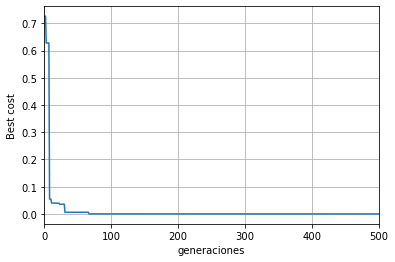

In [62]:
#parámetros
costfunc = sum_var
num_var =2
varmin=-10
varmax=10

maxit=500
npop=20
beta=1
prop_children=1
num_children = int(np.round(prop_children*npop/2)*2)
mu = 0.2
sigma=0.1

out = ga(costfun, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta)

plt.plot(out[2])
plt.xlim(0,maxit)
plt.xlabel('generaciones')
plt.ylabel('Best cost')
plt.grid()
plt.show()

In [64]:
out[1]

array([[-0.76213776, -0.38106516],
       [-0.76213776, -0.38106516],
       [-0.76213776, -0.38106516],
       [-0.71380395, -0.34381547],
       [-0.71380395, -0.34381547],
       [-0.71380395, -0.34381547],
       [-0.71380395, -0.34381547],
       [-0.71380395, -0.34381547],
       [-0.14295748, -0.18452224],
       [-0.14295748, -0.18452224],
       [-0.14295748, -0.18452224],
       [ 0.19572152,  0.04313779],
       [ 0.19572152,  0.04313779],
       [ 0.19572152,  0.04313779],
       [ 0.19572152,  0.04313779],
       [ 0.19572152,  0.04313779],
       [ 0.19572152,  0.04313779],
       [ 0.18822211, -0.06396208],
       [ 0.18822211, -0.06396208],
       [ 0.18822211, -0.06396208],
       [ 0.18822211, -0.06396208],
       [ 0.18822211, -0.06396208],
       [ 0.18822211, -0.06396208],
       [-0.1013803 , -0.15943004],
       [-0.1013803 , -0.15943004],
       [-0.1013803 , -0.15943004],
       [-0.1013803 , -0.15943004],
       [-0.1013803 , -0.15943004],
       [-0.1013803 ,

In [65]:
def f(x,y):
    return x**2+y**2

In [66]:
x=np.linspace(-10,10,30)
y=np.linspace(-10,10,30)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

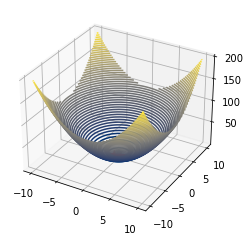

In [72]:
fig = plt.figure()
ax= plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap=plt.cm.cividis)
for i in range(out[1].shape[0]):
    if i%10==0:
        plt.plot(out[1][i][0], out[1][i][1], out[2][i], '*r', ms=10 )
    


### Ejemplo 2:

In [73]:
def f2(x,y):
    return (x-2)**2 + x*y + (y-2)**2

In [74]:
Z2 = f2(X,Y)

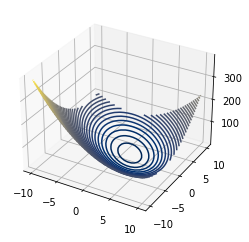

In [75]:
fig = plt.figure()
ax= plt.axes(projection='3d')
ax.contour3D(X,Y,Z2,50,cmap=plt.cm.cividis)

In [78]:
def conv1(x):
    return (x[0]-2)**2+(x[1]-2)**2 +x[0]*x[1]

best_sol: {'position': array([0.58507459, 9.53377164]), 'cost': 91.23511394256037}
iteración 0, best_sol [-0.45858964  1.8768321 ], best_cost 3.732803179165605
iteración 1, best_sol [-1.05814607  1.4688059 ], best_cost 3.2770638585253966
iteración 2, best_sol [-0.44287692  1.6025717 ], best_cost 2.7643760358059724
iteración 3, best_sol [-0.44287692  1.6025717 ], best_cost 2.7643760358059724
iteración 4, best_sol [-0.44287692  1.6025717 ], best_cost 2.7643760358059724
iteración 5, best_sol [-0.44287692  1.6025717 ], best_cost 2.7643760358059724
iteración 6, best_sol [-1.07994875  1.20296786], best_cost 2.613420979844566
iteración 7, best_sol [-1.07994875  1.20296786], best_cost 2.613420979844566
iteración 8, best_sol [-1.07994875  1.20296786], best_cost 2.613420979844566
iteración 9, best_sol [0.27075259 1.21230543], best_cost 1.542991419447622
iteración 10, best_sol [0.27075259 1.21230543], best_cost 1.542991419447622
iteración 11, best_sol [0.27075259 1.21230543], best_cost 1.54299141

iteración 125, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 126, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 127, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 128, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 129, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 130, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 131, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 132, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 133, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 134, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 135, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 136, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 137, b

iteración 225, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 226, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 227, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 228, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 229, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 230, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 231, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 232, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 233, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 234, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 235, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 236, best_sol [ 0.11643228 -0.02800131], best_cost 0.014340548547528887
iteración 237, b

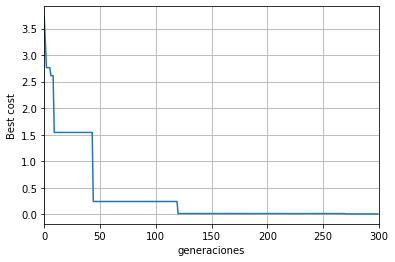

In [80]:
#parámetros
costfunc = conv1
num_var =2
varmin=-10
varmax=10

maxit=300
npop=10
beta=1
prop_children=1
num_children = int(np.round(prop_children*npop/2)*2)
mu = 0.6
sigma=0.1

out = ga(costfun, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta)

plt.plot(out[2])
plt.xlim(0,maxit)
plt.xlabel('generaciones')
plt.ylabel('Best cost')
plt.grid()
plt.show()

### Ejemplo 3: